In [1]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn import datasets

import numpy as np

%load_ext autoreload
%autoreload 2

/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pyparsing.py:2927: FutureWarning: Possible set intersection at position 3
  self.re = re.compile( self.reString )


In [2]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

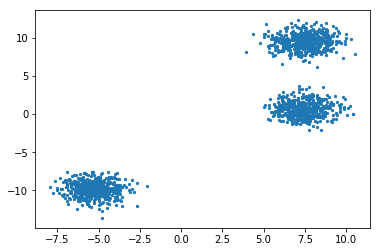

In [3]:
X = blobs[0]
# X = datasets.load_iris().data
# X = datasets.load_digits().data
ClusterUtils.visualize_sample_data(X)

### Test with Parallel Runs

In [4]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['KMeans'], 
                                       dim_reduction_alg_ls=['LatentDirichletAllocation'],
                                       n_evaluations=40, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {KMeans}, Default: KMeans
    dim_reduction_choice, Type: Categorical, Choices: {LatentDirichletAllocation}, Default: LatentDirichletAllocation
    learning_method___LatentDirichletAllocation, Type: Categorical, Choices: {batch, online}, Default: batch
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 30], Default: 5
    n_components___LatentDirichletAllocation, Type: Ordinal, Sequence: {1, 2, 3, 4, 5, 6, 7, 8, 9}, Default: 2
    random_state___LatentDirichletAllocation, Type: Ordinal, Sequence: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, Default: 1
  Conditions:
    learning_method___LatentDirichletAllocation | dim_reduction_choice in {'LatentDirichletAllocation'}
    n_clusters___KMeans | clustering_choice in {'KMeans'}
    n_components___LatentDirichletAllocation | dim_reduction_choice in {'LatentDirichletAllocation'}
    random_state___LatentDirichletAllocation | dim_reduction_choice in {'

Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 10, 'n_components___LatentDirichletAllocation': 1}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 30, 'n_components___LatentDirichletAllocation': 6, 'random_state___LatentDirichletAllocation': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 19, 'n_components___LatentDirichletAllocation': 5, 'random_state___LatentDirichletAllocation': 1}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 4, 'n_components___LatentDirichletAllocation': 5, 'random_state___LatentDirichletAllocation': 9}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 14, 'n_components___LatentDirichletAllocation': 6, 'random_state___LatentDirichletAllocation': 3}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 14, 'n_components___LatentDirichletAllocation': 8, 'random_state___LatentDirichletAllocation': 9}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 19, 'n_components___LatentDirichletAllocation': 3, 'random_state___LatentDirichletAllocation': 2}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 7, 'n_components___LatentDirichletAllocation': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 21, 'n_components___LatentDirichletAllocation': 6, 'random_state___LatentDirichletAllocation': 2}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 12, 'n_components___LatentDirichletAllocation': 2, 'random_state___LatentDirichletAllocation': 1}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 15, 'n_components___LatentDirichletAllocation': 7, 'random_state___LatentDirichletAllocation': 3}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 12, 'n_components___LatentDirichletAllocation': 1, 'random_state___LatentDirichletAllocation': 5}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 16, 'n_components___LatentDirichletAllocation': 4, 'random_state___LatentDirichletAllocation': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 17, 'n_components___LatentDirichletAllocation': 8, 'random_state___LatentDirichletAllocation': 8}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 25, 'n_components___LatentDirichletAllocation': 3}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 2, 'n_components___LatentDirichletAllocation': 6, 'random_state___LatentDirichletAllocation': 7}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 13, 'n_components___LatentDirichletAllocation': 7, 'random_state___LatentDirichletAllocation': 8}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 5, 'n_components___LatentDirichletAllocation': 4}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 6, 'n_components___LatentDirichletAllocation': 6, 'random_state___LatentDirichletAllocation': 2}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 19, 'n_components___LatentDirichletAllocation': 8, 'random_state___LatentDirichletAllocation': 1}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 8, 'n_components___LatentDirichletAllocation': 9, 'random_state___LatentDirichletAllocation': 5}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 19, 'n_components___LatentDirichletAllocation': 7, 'random_state___LatentDirichletAllocation': 9}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 2, 'n_components___LatentDirichletAllocation': 6, 'random_state___LatentDirichletAllocation': 5}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 16, 'n_components___LatentDirichletAllocation': 1, 'random_state___LatentDirichletAllocation': 2}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 14, 'n_components___LatentDirichletAllocation': 3, 'random_state___LatentDirichletAllocation': 2}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 26, 'n_components___LatentDirichletAllocation': 2, 'random_state___LatentDirichletAllocation': 7}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 9, 'n_components___LatentDirichletAllocation': 8, 'random_state___LatentDirichletAllocation': 1}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 16, 'n_components___LatentDirichletAllocation': 3, 'random_state___LatentDirichletAllocation': 1}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 10, 'n_components___LatentDirichletAllocation': 9, 'random_state___LatentDirichletAllocation': 5}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 13, 'n_components___LatentDirichletAllocation': 2, 'random_state___LatentDirichletAllocation': 7}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 21, 'n_components___LatentDirichletAllocation': 4, 'random_state___LatentDirichletAllocation': 6}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 11, 'n_components___LatentDirichletAllocation': 3, 'random_state___LatentDirichletAllocation': 6}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 10, 'n_components___LatentDirichletAllocation': 1, 'random_state___LatentDirichletAllocation': 7}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 27, 'n_components___LatentDirichletAllocation': 4, 'random_state___LatentDirichletAllocation': 7}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 27, 'n_components___LatentDirichletAllocation': 3, 'random_state___LatentDirichletAllocation': 7}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 8, 'n_components___LatentDirichletAllocation': 1, 'random_state___LatentDirichletAllocation': 5}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'online', 'n_clusters___KMeans': 10, 'n_components___LatentDirichletAllocation': 7, 'random_state___LatentDirichletAllocation': 5}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 19, 'n_components___LatentDirichletAllocation': 2, 'random_state___LatentDirichletAllocation': 6}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 14, 'n_components___LatentDirichletAllocation': 6, 'random_state___LatentDirichletAllocation': 7}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 134, in evaluate_model
    candidate_model, _, compressed_data = fit_model(cfg)
  File "/home/sjlee0218/coding_project/automl_2019/autocluster/autocluster.py", line 117, in fit_model
    compressed_data = dim_reduction_model.fit_transform(scaled_data)
  File "/home/sjlee0218/anaconda3/envs/sjlee_env/lib/python3.7/site-packages/sklearn/base.py", line 553, in fit_transform
  

Fitting configuration: {'clustering_choice': 'KMeans', 'dim_reduction_choice': 'LatentDirichletAllocation', 'learning_method___LatentDirichletAllocation': 'batch', 'n_clusters___KMeans': 5, 'n_components___LatentDirichletAllocation': 2, 'random_state___LatentDirichletAllocation': 1}


ValueError: Negative values in data passed to LatentDirichletAllocation.fit

In [17]:
opt_result

Configuration:
  algorithm___TruncatedSVD, Value: 'arpack'
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'spherical'
  dim_reduction_choice, Value: 'TruncatedSVD'
  init_params___GaussianMixture, Value: 'random'
  n_components___GaussianMixture, Value: 15
  n_components___TruncatedSVD, Value: 1
  random_state___GaussianMixture, Value: 9
  random_state___TruncatedSVD, Value: 0
  warm_start___GaussianMixture, Value: True

In [18]:
predictions = autocluster.predict(X)
np.unique(predictions)

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 720x720 with 0 Axes>

In [10]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   algorithm___FastICA, Value: 'parallel'
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'FastICA'
   fun___FastICA, Value: 'logcosh'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___FastICA, Value: 2
   n_components___GaussianMixture, Value: 5
   random_state___FastICA, Value: 1
   random_state___GaussianMixture, Value: 0
   warm_start___GaussianMixture, Value: False
   whiten___FastICA, Value: True
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0002067089080810547),
 TrajEntry(train_perf=-0.5640013404575112, incumbent_id=1, incumbent=Configuration:
   algorithm___FastICA, Value: 'parallel'
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'FastICA'
   fun___FastICA, Value: 'logcosh'
   init_params___GaussianMixture, Value: 'kmean

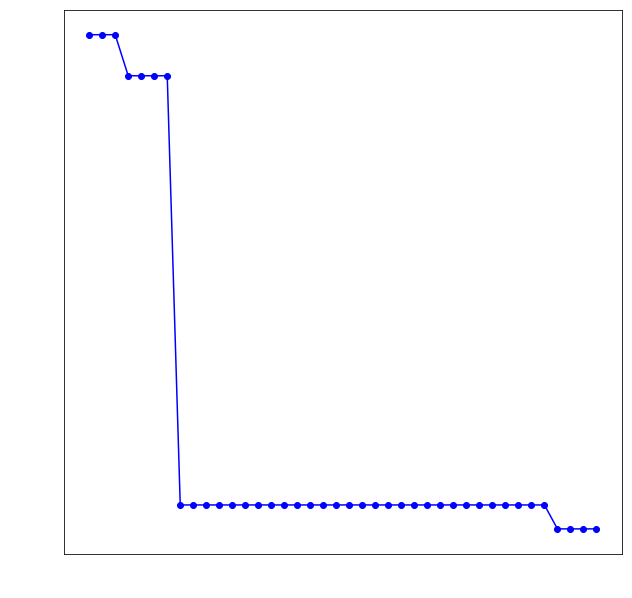

In [11]:
autocluster.plot_convergence()